<a href="https://colab.research.google.com/github/JoleneShyu/Test-project/blob/main/%E9%81%B8%E5%9D%80KNNtestrun_%E5%88%86%E4%B8%89%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kdnuggets.com/2020/04/introduction-k-nearest-neighbour-algorithm-using-examples.html

In [56]:
import os
os.listdir() #左邊檔案裏要開放連結到我的雲端硬碟,os.listdir()才能抓到'drive',才能找到放在雲端硬碟的檔案路徑
os.listdir('drive/MyDrive/Colab Notebooks/AIA Project')

['選址因子0503.xlsx',
 'AIA_2_locationchooser.ipynb',
 '選址因子0503_cordinator.xlsx',
 '選址因子0503_Jolene_KNNtest.xlsx',
 '選址XGboost_testrun.ipynb',
 '選址因子06012_J_data.xlsx',
 '選址KNNtestrun.ipynb',
 '選址XGBClassifier_testrun.ipynb',
 '選址因子06012_J_data_3類.xlsx']

In [57]:
# Import everything
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create a DataFrame
df = pd.read_excel('drive/MyDrive/Colab Notebooks/AIA Project/選址因子06012_J_data_3類.xlsx')

# Print the head of the data. #df.head() will defaul to first 5 rows
df.head()
df


,業績分類,University,HighSchool,MainCompeteChain,Pharmacy,Attractions,Hospital,IndustyPark,PublicAgency,Transport,HyperMart,Convienence\n,FastFood,OtherCompeteChain\n,Gas/Incinerator,Trail/Substation,Markets
0,1,2,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0
1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,2,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,3,0,0,0,0,0,0,1,1,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,100,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0
106,100,0,0,1,2,0,0,0,0,0,1,1,0,3,1,0,1
107,100,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0
108,100,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('業績分類', axis=1))
sc_transform = scaler.transform(df.drop('業績分類', axis=1))
sc_df = pd.DataFrame(sc_transform)

# Now you can safely use sc_df as your input features.
sc_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,5.776655,-0.333333,-1.123246,-0.400583,1.085889,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,-0.971375,-0.553969,1.037393,-0.280056,0.0,-0.528673
1,-0.304034,-0.333333,1.622467,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,-0.971375,-0.553969,-1.000343,-0.280056,0.0,-0.528673
2,-0.304034,-0.333333,-1.123246,-0.400583,1.085889,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,1.603354,-0.553969,0.018525,-0.280056,0.0,-0.528673
3,-0.304034,-0.333333,-1.123246,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,-0.971375,-0.553969,0.018525,-0.280056,0.0,-0.528673
4,-0.304034,-0.333333,1.622467,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,1.435952,0.315989,1.092966,0.018525,-0.280056,0.0,3.481948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,-0.304034,-0.333333,-0.208009,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,1.603354,-0.553969,0.018525,-0.280056,0.0,-0.528673
106,-0.304034,-0.333333,-0.208009,4.783427,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,1.435952,0.315989,-0.553969,2.056261,2.287124,0.0,1.476638
107,-0.304034,-0.333333,-1.123246,2.191422,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,0.315989,-0.553969,1.037393,-0.280056,0.0,-0.528673
108,-0.304034,-0.333333,-0.208009,-0.400583,-0.528271,-0.397360,-0.167444,-0.421811,-0.428505,-0.467117,0.315989,-0.553969,-1.000343,-0.280056,0.0,-0.528673


In [59]:
from sklearn.model_selection import train_test_split

X = sc_transform
y = df['業績分類']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Text(0, 0.5, 'Error Rate')

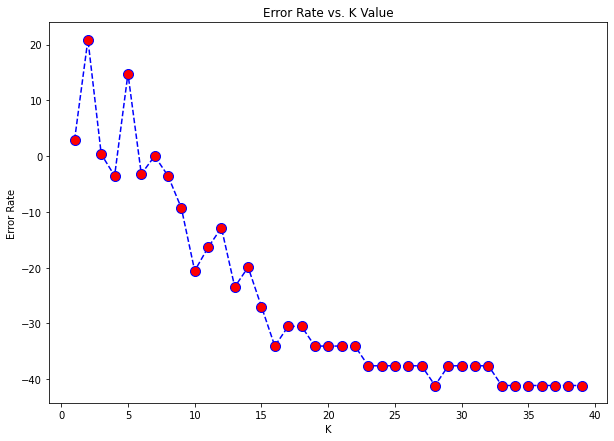

In [60]:
# Initialize an array that stores the error rates.
from sklearn.neighbors import KNeighborsClassifier

error_rates = []
test_scores = []
train_scores = []

for a in range(1, 40):
    k = a
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    error_rates.append(np.mean(y_test - preds))
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

plt.figure(figsize=(10, 7))
plt.plot(range(1,40),error_rates,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 98.78048780487805 % and k = [1]


In [62]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))
ts=list(map(lambda x: x+1, test_scores_ind))

Max test score 64.28571428571429 % and k = [14, 15]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Score')

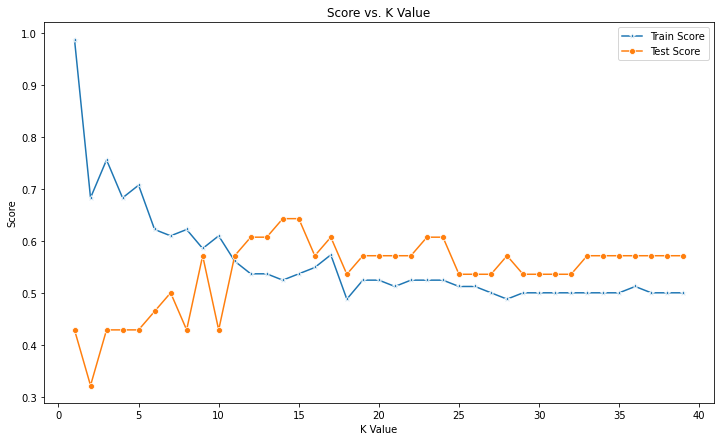

In [63]:
plt.figure(figsize=(12,7))
p = sns.lineplot(range(1,40),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,40),test_scores,marker='o',label='Test Score')
plt.title('Score vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Score')

In [64]:
ts

[14, 15]

In [65]:
k = ts[0]
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[ 4  0  4]
 [ 0  0  4]
 [ 2  0 14]]
              precision    recall  f1-score   support

           1       0.67      0.50      0.57         8
          10       0.00      0.00      0.00         4
         100       0.64      0.88      0.74        16

    accuracy                           0.64        28
   macro avg       0.43      0.46      0.44        28
weighted avg       0.55      0.64      0.58        28



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
